In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import calendar
from datetime import datetime
from datetime import date
%matplotlib inline

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
train


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0000,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,0,1,1
5,2011-01-01 5:00:00,1,0,0,2,9.84,12.880,75.0,6.0032,0,1,1
6,2011-01-01 6:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,2,0,2
7,2011-01-01 7:00:00,1,0,0,1,8.20,12.880,86.0,0.0000,1,2,3
8,2011-01-01 8:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,1,7,8
9,2011-01-01 9:00:00,1,0,0,1,13.12,17.425,76.0,0.0000,8,6,14


In [4]:
train.dtypes


datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [6]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
dtype: int64

In [7]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

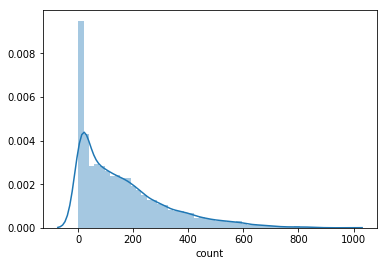

In [8]:
sn.distplot(train["count"])

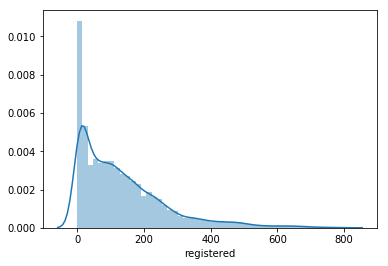

In [9]:
sn.distplot(train["registered"])

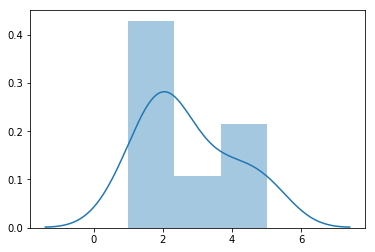

In [10]:
a=[1,2,3,4,5,2,2]
sn.distplot(a)

In [13]:
corr = train[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
type(corr)

pandas.core.frame.DataFrame

In [14]:
mask=np.array(corr)
mask

array([[ 1.        ,  0.99183916,  0.4594135 ,  0.34445105, -0.04847786,
        -0.00866888,  0.41593836],
       [ 0.99183916,  1.        ,  0.45401532,  0.34234531, -0.03160613,
        -0.04999706,  0.41264434],
       [ 0.4594135 ,  0.45401532,  1.        ,  0.50917543, -0.32025345,
         0.07952397,  0.70793834],
       [ 0.34445105,  0.34234531,  0.50917543,  1.        , -0.27950085,
         0.1005788 ,  0.96832875],
       [-0.04847786, -0.03160613, -0.32025345, -0.27950085,  1.        ,
        -0.2969754 , -0.32226874],
       [-0.00866888, -0.04999706,  0.07952397,  0.1005788 , -0.2969754 ,
         1.        ,  0.10560659],
       [ 0.41593836,  0.41264434,  0.70793834,  0.96832875, -0.32226874,
         0.10560659,  1.        ]])

In [18]:
#mask[np.tril_indices_from(mask)]
mask[np.tril_indices_from(mask)]=False

In [19]:
mask

array([[ 0.        ,  0.99183916,  0.4594135 ,  0.34445105, -0.04847786,
        -0.00866888,  0.41593836],
       [ 0.        ,  0.        ,  0.45401532,  0.34234531, -0.03160613,
        -0.04999706,  0.41264434],
       [ 0.        ,  0.        ,  0.        ,  0.50917543, -0.32025345,
         0.07952397,  0.70793834],
       [ 0.        ,  0.        ,  0.        ,  0.        , -0.27950085,
         0.1005788 ,  0.96832875],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.2969754 , -0.32226874],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.10560659],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ]])

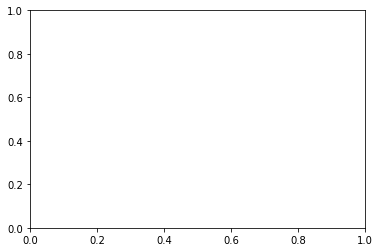

In [23]:
fig,ax=plt.subplots()

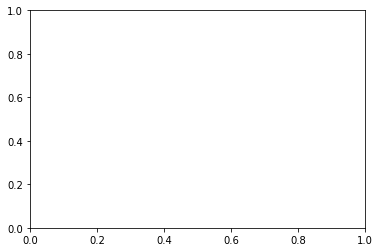

In [24]:
fig

In [25]:
ax

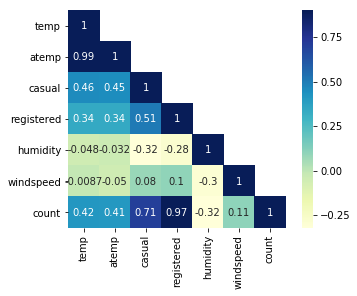

In [31]:
fig.set_size_inches(20,10)
sn.heatmap(corr,mask=mask,cmap="YlGnBu",vmax=0.9,annot=True,square=True)

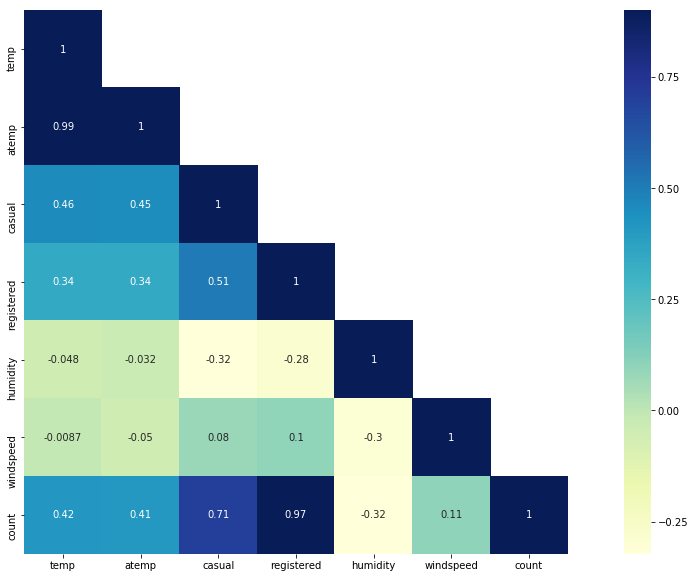

In [32]:
corr = train[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

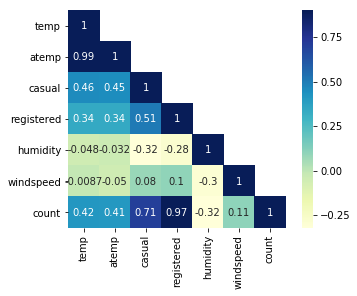

In [33]:
sn.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [34]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [35]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
dtype: int64

In [36]:
type(train['datetime'])

pandas.core.series.Series

In [37]:
train['datetime'].dtype

dtype('O')

In [43]:
def change(x):
    x=x+1
    return x
    

In [48]:
train["extra"]=train.humidity.apply(change)

In [49]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,extra
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0000,3,13,16,82.0
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,8,32,40,81.0
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,5,27,32,81.0
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,3,10,13,76.0
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,0,1,1,76.0
5,2011-01-01 5:00:00,1,0,0,2,9.84,12.880,75.0,6.0032,0,1,1,76.0
6,2011-01-01 6:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,2,0,2,81.0
7,2011-01-01 7:00:00,1,0,0,1,8.20,12.880,86.0,0.0000,1,2,3,87.0
8,2011-01-01 8:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,1,7,8,76.0
9,2011-01-01 9:00:00,1,0,0,1,13.12,17.425,76.0,0.0000,8,6,14,77.0


In [51]:
train.drop("extra",axis=1,inplace=True)

In [52]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0000,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,0,1,1
5,2011-01-01 5:00:00,1,0,0,2,9.84,12.880,75.0,6.0032,0,1,1
6,2011-01-01 6:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,2,0,2
7,2011-01-01 7:00:00,1,0,0,1,8.20,12.880,86.0,0.0000,1,2,3
8,2011-01-01 8:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,1,7,8
9,2011-01-01 9:00:00,1,0,0,1,13.12,17.425,76.0,0.0000,8,6,14


In [56]:
train["date"]=train.datetime.apply(lambda x: x.split()[0])
train["hour"]=train.datetime.apply(lambda x: x.split()[1].split(":")[0])
train["month"]=train.date.apply(lambda x: datetime.strptime(x,"%Y-%m-%d").month)

In [57]:
train["date"].dtype

dtype('O')

In [58]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,month
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0000,3,13,16,2011-01-01,0,1
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,8,32,40,2011-01-01,1,1
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,5,27,32,2011-01-01,2,1
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,3,10,13,2011-01-01,3,1
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,0,1,1,2011-01-01,4,1
5,2011-01-01 5:00:00,1,0,0,2,9.84,12.880,75.0,6.0032,0,1,1,2011-01-01,5,1
6,2011-01-01 6:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,2,0,2,2011-01-01,6,1
7,2011-01-01 7:00:00,1,0,0,1,8.20,12.880,86.0,0.0000,1,2,3,2011-01-01,7,1
8,2011-01-01 8:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,1,7,8,2011-01-01,8,1
9,2011-01-01 9:00:00,1,0,0,1,13.12,17.425,76.0,0.0000,8,6,14,2011-01-01,9,1


In [59]:
test["date"]=train.datetime.apply(lambda x: x.split()[0])
test["hour"]=train.datetime.apply(lambda x: x.split()[1].split(":")[0])
test["month"]=train.date.apply(lambda x: datetime.strptime(x,"%Y-%m-%d").month)

In [60]:
training = train[train['datetime']<='2012-03-30 0:00:00']
validation = train[train['datetime']>'2012-03-30 0:00:00']

In [61]:
training

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,month
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0000,3,13,16,2011-01-01,0,1
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,8,32,40,2011-01-01,1,1
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,5,27,32,2011-01-01,2,1
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,3,10,13,2011-01-01,3,1
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,0,1,1,2011-01-01,4,1
5,2011-01-01 5:00:00,1,0,0,2,9.84,12.880,75.0,6.0032,0,1,1,2011-01-01,5,1
6,2011-01-01 6:00:00,1,0,0,1,9.02,13.635,80.0,0.0000,2,0,2,2011-01-01,6,1
7,2011-01-01 7:00:00,1,0,0,1,8.20,12.880,86.0,0.0000,1,2,3,2011-01-01,7,1
8,2011-01-01 8:00:00,1,0,0,1,9.84,14.395,75.0,0.0000,1,7,8,2011-01-01,8,1
9,2011-01-01 9:00:00,1,0,0,1,13.12,17.425,76.0,0.0000,8,6,14,2011-01-01,9,1


In [62]:
train = train.drop(['datetime','date', 'atemp'],axis=1)
test = test.drop(['datetime','date', 'atemp'], axis=1)
training = training.drop(['datetime','date', 'atemp'],axis=1)
validation = validation.drop(['datetime','date', 'atemp'],axis=1)

In [63]:
from sklearn.linear_model import LinearRegression

In [64]:
ob=LinearRegression()

In [65]:
type(ob)

sklearn.linear_model.base.LinearRegression

In [66]:
ob

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [69]:
x_train=training.drop('count',axis=1)
y_train=np.log(training['count'])
x_val=validation.drop('count',axis=1)
y_val=np.log(validation['count'])

In [70]:
ob.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [71]:
pred=ob.predict(x_val)

In [72]:
pred

array([2.79051793, 2.69546734, 2.69630268, ..., 5.260282  , 4.54753822,
       3.2617522 ])

In [76]:
test_pred=ob.predict(test)

In [77]:
final_pred=np.exp(test_pred)

In [79]:
type(final_pred)

numpy.ndarray

In [80]:
test['count']=final_pred

In [81]:
test

,season,holiday,workingday,weather,temp,humidity,windspeed,casual,registered,hour,month,count
0,3,0,0,3,26.24,89.0,15.0013,3,55,0,1,24.168582
1,3,0,0,2,26.24,89.0,0.0000,7,54,1,1,24.567142
2,3,0,0,2,26.24,89.0,0.0000,3,20,2,1,19.921817
3,3,0,0,2,25.42,94.0,0.0000,3,15,3,1,19.772302
4,3,0,0,1,26.24,89.0,11.0014,3,7,4,1,20.225915
5,3,0,0,1,26.24,89.0,11.0014,6,36,5,1,26.977280
6,3,0,0,1,26.24,89.0,11.0014,10,82,6,1,40.982993
7,3,0,0,1,26.24,89.0,11.0014,26,168,7,1,88.458046
8,3,0,0,1,26.24,89.0,11.0014,41,234,8,1,163.960705
9,3,0,0,1,36.08,30.0,16.9979,96,308,9,1,564.936342
